### Sprawozdanie - Faktoryzacja QR
<div style="text-align: right"> Wojciech Kosztyła </div>

In [497]:
import numpy as np
from matplotlib import pyplot as plt

#### Zadanie 1

Napisz funkcję dokonującą faktoryzacji $QR$ macierzy $A \epsilon R^{nxn}$, $A = [a_{1}, a_{2},...,a_{n}]$

($a_{i}$ to kolejne kolumny macierzy $A$) klasyczną metodą ortogonalizacji Grama-Schmidta:

Dla $k = 1$:

$u_{1} ←\frac{a_{1}}{||a_{1}||}$


Dla $k > 1$:

$u_{k} ←a_{k} − \sum_{i=1}^{k-1}[u_{i},a_{k}]u_{i}$

$u_{k} ← \frac{u_{k}}{||u_{k}||}$

In [498]:
def norma_z_wektora(wektor):
    wynik = 0
    for wartosc in wektor:
        wynik += wartosc ** 2
    return np.sqrt(wynik)

In [499]:
def wylicz_Q(A):
    n = len(A)
    wektory_U = np.zeros((n,n))

    for k in range(n):
        if k==0:
            wektory_U[:,k] = A[:,k] / norma_z_wektora(A[:,k])
        else:
            temp = np.zeros(n, dtype=float)
            for j in range(k):
                temp += np.dot(wektory_U[:,j], A[:,k]) * wektory_U[:,j]
            u_k = A[:,k] - temp
            wektory_U[:,k] = u_k / norma_z_wektora(u_k)

    return wektory_U

Postanowiłem nie tworzyć oddzielnej funkcji do wyliczania pojedynczego wektora $u_{i}$, gdyż korzystają one z wartości wczesniej obliczonych.

In [500]:
def faktoryzacja_QR(A):
    n = len(A)
    Q = wylicz_Q(A)
    R = np.zeros((n,n), dtype=float)
    for i in range(n):
        for j in range(i+1):
            R[j][i] = np.dot(Q[:,j], A[:,i])
    return Q,R

In [501]:
macierz_1 = np.array([[1,   2,  3],
                      [4,   5,  6],
                      [7,   0,  9]])

q1a,r1a = faktoryzacja_QR(macierz_1)
q1b,r1b = np.linalg.qr(macierz_1)

print("Moja implementacja")
print("\nQ:")
print(q1a)
print("\nR:")
print(r1a)
print("\nQxR:")
print(np.dot(q1a, r1a))
print("\n\n")
print("Biblioteczne")
print("\nQ:")
print(q1b)
print("\nR:")
print(r1b)
print("\nQxR:")
print(np.dot(q1b, r1b))

Moja implementacja

Q:
[[ 0.12309149  0.35805744  0.9255503 ]
 [ 0.49236596  0.78772636 -0.37022012]
 [ 0.86164044 -0.50128041  0.07933288]]

R:
[[ 8.1240384   2.7080128  11.07823419]
 [ 0.          4.65474668  1.28900677]
 [ 0.          0.          1.26932612]]

QxR:
[[ 1.00000000e+00  2.00000000e+00  3.00000000e+00]
 [ 4.00000000e+00  5.00000000e+00  6.00000000e+00]
 [ 7.00000000e+00 -1.35005032e-16  9.00000000e+00]]



Biblioteczne

Q:
[[-0.12309149 -0.35805744 -0.9255503 ]
 [-0.49236596 -0.78772636  0.37022012]
 [-0.86164044  0.50128041 -0.07933288]]

R:
[[ -8.1240384   -2.7080128  -11.07823419]
 [  0.          -4.65474668  -1.28900677]
 [  0.           0.          -1.26932612]]

QxR:
[[1.0000000e+00 2.0000000e+00 3.0000000e+00]
 [4.0000000e+00 5.0000000e+00 6.0000000e+00]
 [7.0000000e+00 1.1972626e-15 9.0000000e+00]]


Jak widać różnice między moją implementacją a funkcją biblioteczną są znikome. Różnica w znakach Q i R nie zmienia faktu, że moja implementacja jest poprawna - w końcu $(-) * (-) = (+)$.

In [502]:
def random_int(min_wielkosc, max_wielkosc):
    return int(min_wielkosc + (max_wielkosc-min_wielkosc)*np.random.rand(1)[0])

ilosc_testow = 5
min_wielkosc = 3
max_wielkosc = 7
for i in range(ilosc_testow):
    n = random_int(min_wielkosc, max_wielkosc)
    temp_macierz = np.random.rand(n,n)

    Q_moje, R_moje = faktoryzacja_QR(temp_macierz)
    Q_bibl, R_bibl = np.linalg.qr(temp_macierz)

    print("Moja implementacja")
    print("\nQ:\n{}\nR:\n{}\nQxR:\n{}\n\n".format(Q_moje, R_moje, np.dot(Q_moje, R_moje)))
    print("Bibliotecznie")
    print("\nQ:\n{}\nR:\n{}\nQxR:\n{}\n\n".format(Q_bibl, R_bibl, np.dot(Q_bibl, R_bibl)))

Moja implementacja

Q:
[[ 0.21892265  0.32043471  0.39913702  0.83071302]
 [ 0.62601548 -0.42394731 -0.59050296  0.28227565]
 [ 0.16333577  0.84344336 -0.49483241 -0.13063536]
 [ 0.7304101   0.0786992   0.49712853 -0.46170417]]
R:
[[1.29011711 0.68776918 1.04703171 0.77834981]
 [0.         0.79204339 0.8834641  0.52366254]
 [0.         0.         0.28908038 0.15267259]
 [0.         0.         0.         0.46181082]]
QxR:
[[0.28243586 0.40436644 0.6276942  0.78276759]
 [0.80763328 0.09476949 0.110213   0.30545804]
 [0.21072228 0.78038105 0.77312333 0.43293589]
 [0.94231457 0.56468674 0.97800056 0.4724043 ]]


Bibliotecznie

Q:
[[-0.21892265  0.32043471  0.39913702 -0.83071302]
 [-0.62601548 -0.42394731 -0.59050296 -0.28227565]
 [-0.16333577  0.84344336 -0.49483241  0.13063536]
 [-0.7304101   0.0786992   0.49712853  0.46170417]]
R:
[[-1.29011711 -0.68776918 -1.04703171 -0.77834981]
 [ 0.          0.79204339  0.8834641   0.52366254]
 [ 0.          0.          0.28908038  0.15267259]
 [ 0.

We wszystkich testach różnica pomiędzy moją implementacją a funkcjami bibliotecznymi jest bardzo znikoma.

Wygeneruj 30-50 przykładowych macierzy $8×8$ o różnym wskaźniku uwarunkowania $cond(A_{i})$ (stosunek największej do najmniejszej wartości osobliwej). Wykorzystaj w tym celu SVD oraz biblioteczną funkcję realizującą dekompozycję QR (potrzebne będą dwie losowe macierze ortogonalne oraz diagonalna macierz odpowiednio szybko malejących wartości osobliwych).

In [503]:
def stworz_macierz_condA(condA, n):
    temp_macierz = np.random.rand(n,n)
    u, s, vh = np.linalg.svd(temp_macierz)      # s ustawione malejąco

    s[0] = condA * s[n-1]
    low = s[n-1]
    high = s[0]
    for i in range(1, n-1):
        s[i] = np.random.uniform(low, high)

    macierz_diagonalna = np.diag(s)
    return np.dot(np.dot(u, macierz_diagonalna), vh)



 Dla każdej z uzyskanych w ten sposób macierzy $A_{i}$
 wyznacz faktoryzację QR korzystając z zaimplementowanej funkcji ($A_{i} = Q_{i}R_{i}$).
 Przedstaw zależność $||I−Q^{T}_{i}Q_{i}||$ od $cond(A_{i})$.


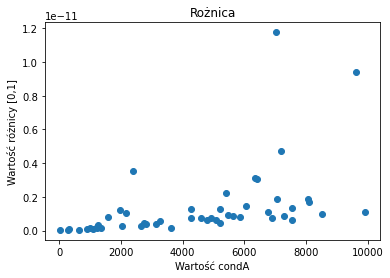

In [504]:
ile_macierzy = 50
macierze = []
wartosci_condA = []
roznice = []        # I - Qtrans*Q
for i in range(ile_macierzy):
    wartosc_condA = random_int(10, 10000)
    while(wartosc_condA in wartosci_condA):
        wartosc_condA = random_int(10, 10000)

    wartosci_condA.append(wartosc_condA)
    macierz = stworz_macierz_condA(wartosc_condA, 8)
    macierze.append(macierz)

    Q, R = faktoryzacja_QR(macierz)

    I = np.identity(len(Q))

    roznica = np.linalg.norm(I - np.dot(Q.transpose(), Q))
    roznice.append(roznica)


fig1, ax1 = plt.subplots()
ax1.set_title("Rożnica")
ax1.set_xlabel("Wartość condA")
ax1.set_ylabel("Wartość różnicy [0,1]")

plt.plot(wartosci_condA, roznice, 'o')


Rozbieżność jest wynikiem błędu reprezentacji numerycznej danych wejściowych.

Błąd zostaje bardzo bliski 0 dla różnych wartości $condA$ ($<1e-11$), a sądzę że rzadkie "wyskoki" spowodowane są błędem przy obliczaniu samego błędu.

#### Zadanie 2

Napisz funkcję rozwiązującą nadokreślony układ równań liniowych metodą $QR$ korzystając z własności macierzy ortogonalnych:
$A^{T} = A^{−1}$, a także z mechanizmu $back substitution$. Następnie wykorzystaj ją do rozwiązania problemu aproksymacji średniokwadratowej dla zbioru punktów podanego tabeli poniżej. Przyjmij model postaci:
$f(x) = α_{0} + α_{1}x + α_{2}x^{2}$
 Przedstaw wizualizację uzyskanego wyniku (punkty oraz funkcja aproksymująca f).

In [505]:
x = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
y = [2, 7, 9, 12, 13, 14, 14, 13, 10, 8, 4]

def f(x, a0, a1, a2):
    return a0 + a1* x + a2* x**2


Otrzymałem funkcję w taki sposób:

$ Ax = y $

Rozkładam $A$ na $QR$

$ QRx = y $

Przemnażam razy $Q^{-1}$ z lewej strony


$ Rx = Q^{-1}y $

Z własności macierzy ortogonalnych $Q^{T} = Q^{−1}$

$ Rx = Q^{T}y $


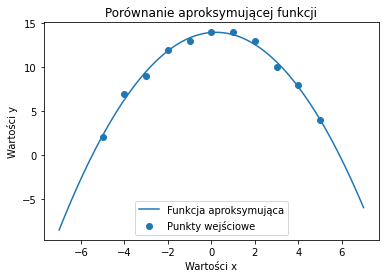

In [506]:
def backwardSubstitution(lewa, prawa):
    y = []
    for i in range(len(prawa)-1, -1, -1):
        temp = prawa[i]
        for j in range(len(prawa)-1, i, -1):
            temp -= lewa[i][j] * y[j-i-1]
        temp /= lewa[i][i]
        y.insert(0, temp)
    return y


n = len(x)
macierz_A = np.zeros((n, 3))

for i in range(n):
    for j in range(3):
        macierz_A[i][j] = x[i] ** j

Q, R = np.linalg.qr(macierz_A)
wyniki = backwardSubstitution(R, np.dot(Q.transpose(), y))


wartosci_x = np.linspace(-7, 7, 100)
wartosci_y = []
for i in wartosci_x:
    wartosci_y.append( f(i, wyniki[0], wyniki[1], wyniki[2]) )

fig1, ax1 = plt.subplots()
ax1.set_title("Porównanie aproksymującej funkcji")
ax1.set_xlabel("Wartości x")
ax1.set_ylabel("Wartości y")
plt.scatter(x, y, label="Punkty wejściowe")
plt.plot(wartosci_x, wartosci_y, label="Funkcja aproksymująca")
ax1.legend()

